## Random Forests  


The performance of a decision tree depends on its structure, that is determined by a greedy method, for example with the CART algorithm. The greedy selection of the best split tends to overfit on the training data, as greedy methods quickly get lost in details since they operate only on local views of the data. We can overcome the tendency to overfit by choosing an early stopping criterion, but we can do even better by combining various overfitting trees into an ensemble -- called a random forest. The disadvantage is that we lose the interpretability of a single tree, but on the other hand, we obtain one of the strongest classifiers to this date.  

The theoretical motivation for the random forest is the bias-variance tradeoff for classification (to be discussed in detail in {ref}`class_evaluation`). Similar to the bias-variance tradeoff in regression, a complex model tends to overfit and consequently has a high variance and low bias. In turn, a simple model has a high bias and low variance. If we now train a couple of overfitting decision trees, for example by setting the stopping criteria pretty lax, such that we get big trees, and if we aggregate the results of those trees, then we get an low bias, low variance classifier.



### Inference 
```{prf:definition} Random Forest
A Random Forest classifier is an ensemble of $m$ decision trees $f_{dt1},\ldots,f_{dtm}$ that aggregates predictions of single trees via a majority vote. Let $\mathbb{1}(\vvec{p})\in\{0,1\}^c$ denote the one-hot encoded argmax function (also called hardmax), such that $\mathbb{1}(\vvec{p})_y=1$ if and only if $y = \argmax_{1\leq l\leq c} p_l$. We define then the random forest classifier as 
$$ f_{rf}(\vvec{x})= \frac{1}{m}\sum_{j=1}^m \mathbb{1}(f_{dtj}(\vvec{x})).$$
As a result, the random forest predicts the class that wins the majority vote of all decision trees.
\begin{align*}
\hat{y} & = \argmax_y\ f_{rf}(\vvec{x})_y\\
&= \mathrm{mode}(\{\hat{y}_{dtj}\mid 1\leq j\leq m\})
\end{align*}
```
The inference of a radom forest is a simple majority vote of the decision trees. For any ensemble of classifiers, predicting the class over a majority vote, we can derive an error bound that details which characteristics of the base classifiers make a strong ensemble. The error bound considers each tree the outcome of a random variable $\omega$, that describes the training set of the tree and other random elements that made the tree how it is. 
```{prf:theorem} expected prediction error bound
Let 
\begin{align*}
s(\vvec{x},y) = \argmax_{l\neq y} p_\omega(\hat{y}_\omega(\vvec{x})=l)
\end{align*}
be the most frequently predicted label that is not the actual label of the random forest.
We define the margin function of a random forest as
$$m(\vvec{x},y) = p_\omega(f(\vvec{x};\omega)=y)-\max_{l\neq y}p_\omega(f(\vvec{x};\omega)=l),$$
and the margin function of a tree specified by $\omega$ as
$$m_\omega(\vvec{x},y)= L_{01}(\hat{y}_\omega(\vvec{x}), s(\vvec{x},y))-L_{01}(\hat{y}_\omega(\vvec{x}),y).$$
Further we define the strength of a random forest as the expected margin 
$\mu(m) = \mathbb{E}_{\vvec{x},y}m(\vvec{x},y)$.
Assuming that the expected margin is nonnegative ($\mu\geq 0$), then the expected prediction error of a random forest is bounded by
$$EPE = p\left(y\neq \hat{y}_{\omega}(\vvec{x})\right) \leq \bar{\rho}(m_\omega,m_\hat{\omega})\frac{1-\mu(m)^2}{\mu(m)^2},$$
where 
$$\bar{\rho}(m_\omega,m_\hat{\omega}) = \frac{\rho(m_\omega,m_\hat{\omega})\sigma(m_\omega)\sigma(m_\hat{\omega})}{\mathbb{E}_{\omega,\hat{\omega}}[\sigma(m_\omega)\sigma(m_\hat{\omega})]}$$
is the mean Pearson correlation coefficient of two i.i.d. sampled trees specified by $\omega$ and $\hat{\omega}$.
```
````{toggle}
```{prf:proof}
If the margin is negative, then the prediction of the random forest is not correct. Hence, we can write that the expected prediction error is the probability that the margin is negative 
:::{math}
:label: eq:epe_margin
\begin{align*}
EPE &= p_{\vvec{x},y}(m(\vvec{x},y)<0)\\
&= p_{\vvec{x},y}(m(\vvec{x},y)-\mu(m) < -\mu(m))\\
&= p_{\vvec{x},y}(\mu(m) - m(\vvec{x},y) > \mu(m))
\end{align*}
:::
We can apply Chebychev's inequality to the probability above. Chebychev's inequality states that 
$$p(\lvert x-\mu\rvert\geq w)\leq \frac{\sigma^2}{w^2},$$
where $\mu$ is the expected value and $\sigma^2$ is the variance of random variable $x$.
We apply this to  Eq. {eq}`eq:epe_margin`
\begin{align*}
EPE&\leq  p_{\vvec{x},y}(\lvert\mu(m) - m(\vvec{x},y)\rvert > \mu(m))
\leq \frac{\sigma^2(m)}{\mu(m)^2}.
\end{align*}
Hence, the EPE is bounded above by the variance of the margin divided my the strength of the classifier. Since the variance of the margin does not have a good interpretation with regard to a random forest, we derive now a bound for the variance.

We rewrite the margin of the random forest in dependence of the margin of the trees as
:::{math}
:label: eq:margin_raw
\begin{align*}
m(\vvec{x},y)&= p_\omega(L_{01}(\hat{y}_\omega(\vvec{x}),y)=0) - p_\omega(L_{01}(\hat{y}_\omega(\vvec{x}), s(\vvec{x},y))=0)\\
&=\mathbb{E}_\omega[L_{01}(\hat{y}_\omega(\vvec{x}), s(\vvec{x},y)) - L_{01}(\hat{y}_\omega(\vvec{x}),y)],
\end{align*}
:::
where the last equation derives from the linearity of the expected value and the fact that the expected value of binary random variable is equal to the probability that the binary random variable is equal to one. 
From Eq. {eq}`eq:margin_raw` follows that the expected value of the tree margin function over $\omega$ is the margin function $\mathbb{E}_\omega[m_\omega(\vvec{x},y)]=m(\vvec{x},y)$.
We can now write the variance of the margin with respect to single trees as
:::{math}
:label: eq:var_omega
\begin{align*}
\sigma^2(m) &= \mathbb{E}_{\vvec{x},y}[(m(\vvec{x},y)-\mu(m))^2]\\
&= \mathbb{E}_{\vvec{x},y}[(\mathbb{E}_\omega[m_\omega(\vvec{x},y)-\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)])^2].
\end{align*}
:::
Since we have for any variable of function $h_\omega$, and i.i.d. random variables $\omega$ and $\hat{\omega}$
$$(\mathbb{E}_\omega[h_\omega])^2 =\mathbb{E}_\omega[h_\omega]\mathbb{E}_\hat{\omega}[h_\hat{\omega}] = \mathbb{E}_{\omega,\hat{\omega}}[h_\omega h_\hat{\omega}], $$
we can write Eq. {eq}`eq:var_omega` as

:::{math}
:label: eq:var2
\begin{align*}
\sigma^2(m) &= \mathbb{E}_{\vvec{x},y} \mathbb{E}_{\omega,\hat{\omega}}\left[(m_\omega(\vvec{x},y)-\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)])(m_\hat{\omega}(\vvec{x},y)-\mathbb{E}_{\vvec{x},y}[m_\hat{\omega}(\vvec{x},y)])\right] \\
&= \mathbb{E}_{\omega,\hat{\omega}}[\rho(m_\omega,m_\hat{\omega})\sigma(m_\omega)\sigma(m_\hat{\omega})]
\end{align*}
:::
The last equation derives from the fact that the inner expected value subject to $\omega,\hat{\omega}$ is the covariance of $m_\omega$ and $m_{\hat{\omega}}$. The covariance can be expressed as the Pearson correlation coefficient multiplied with the corresponding standard deviations. Dividing and multiplying Eq. {eq}`eq:var2` with $\mathbb{E}_\omega[\sigma_\omega]^2 = \mathbb{E}_{\omega,\hat{\omega}}[\sigma(m_\omega) \sigma(m_\hat{\omega})]$ yields
\begin{align*}
\sigma^2(m) 
&= \bar{\rho}(m_\omega,m_\hat{\omega})\mathbb{E}_\omega[\sigma(m_\omega)]^2\leq \mathbb{E}_\omega[\sigma^2(m_\omega)]
\end{align*}
where the last inequality stems from Jenssens inequality applied to the convex function $x^2$.
:::{math}
:label: eq:var3
\begin{align*}
\mathbb{E}_\omega[\sigma^2(m_\omega)] &= \mathbb{E}_\omega\left[\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)^2] - \mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)]^2\right]\\
&= \mathbb{E}_\omega\left[\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)^2]\right] - \mathbb{E}_\omega\left[\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)]^2\right]
\end{align*}
:::
We apply again Jenssens inequality and get
\begin{align*}
\mathbb{E}_\omega\left[\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)]^2\right]\geq \mathbb{E}_\omega\left[\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)]\right]^2 = \mu(m)^2
\end{align*}
Further, we have $\mathbb{E}_\omega\left[\mathbb{E}_{\vvec{x},y}[m_\omega(\vvec{x},y)^2]\right]\leq 1$ because $m_\omega(\vvec{x},y)\in\{-1,0,1\}$. As a result, we can bound Eq. {eq}`eq:var3` as
\begin{align*}
\mathbb{E}_\omega[\sigma^2(m_\omega)] &\leq 1-\mu(m)^2.
\end{align*}
This concludes our result.
```
````
The theorem, published in {cite}`breiman2001random`, identifies two properties of the decision trees that bound the EPE of a random forest:
* The strength of the random forest classifier $\mu(m)=\mathbb{E}_{\vvec{x},y}\mathbb{E}_\omega[m_\omega(\vvec{x},y)]$: the higher the expected margin of the decision trees, the better. A high margin indicates that the random forest confidently predicts the correct classes. 
* The correlation between the trees: the lower the correlation is between trees, the better. Note that the correlation is measured in the prediction confidences of the tree for all classes.

The main implication of the EPE bound is that we do not necessarily need an ensemble of highly accurate (high strength) decision trees to make a strong random forest, but that we can also lower the error bound by learning trees that do not correlate much, but make in average still good predictions. This incentivizes strategies to increase the diversity of trees in a random forest. 

### Training
The training procedure of the random forest follows the theoretical motivations for strong ensemble learners. The rough procedure is to sample training data from the given dataset, learn trees that overfit on the dataset samples, and to incorporate further measures to decrease the correlation of trees. For example, by considering for each split only on a sampled subset of the features.
In detail, the learning algorithm for random forests look as follows.

```{prf:algorithm} Random Forest Training
**Input**: training data $\mathcal{D}$, number of features $\hat{d}<d$
1. $\mathcal{DT}\gets\emptyset$ # Initialize the set of trees
1. **for** $j\in\{1,\ldots, m\}$
    1. Draw a bootstrap sample $\mathcal{D}_j$ from $\mathcal{D}$
    2. Train the decision tree $f_{dtj}$ on $\mathcal{D}_j$ with the following specifications: 
        * Set as stopping criterion that the minimum number of samples per split is one (train untill maximum depth is reached).
        * Select for each split randomly $\hat{d}$ features that are considered for finding the best split
    3. $\mathcal{DT}\gets \mathcal{DT}\cup\{f_{dtj}\}$
```
Random forests use a specific sampling procedure to imitate various training datasets from one given training dataset. The employed sampling technique is called **bootstrapping**.

#### Bootstrapping

Bootstrapping is similar to the dataset division known from cross valiadation, only that in bootstrapping the generated datasets overlap, that is, various data points are present in multiple dataset samples. 

```{prf:definition} Bootstrapping
Given a dataset $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n\}$ containing $n$ datapoints. A bootstrap sample $\mathcal{D}_j=\{(\vvec{x}_{i_b},y_{i_b})\mid 1\leq b\leq n\}\subseteq\mathcal{D}$ gathers $n$ uniformly distributed samples ($i_b \sim\mathcal{U}\{1, \dots, n\}$) from $\mathcal{D}$. Hence, $\mathcal{D}_j$ may contain various duplicates of data points.
```
```{note}
It's common to define datasets as mathematical sets, as we have done in this book. However, a mathematical set has no duplicates in general. Datasets on the other hand may contain duplicate data points and in bootstrapping samples this is most often the case. Hence, in order to not get confused, you can also imagine a dataset as a set of thrupels $(i,\vvec{x}_i,y_i)$ where $i$ is an index that is uniquely assigned to each datapoint. We just omit the index from our dataset notation to shorten it. 
```
Let's write a simple example demonstrating what bootstrap samples look like: 

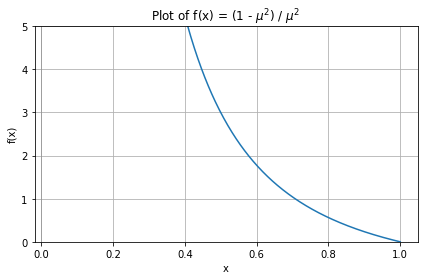

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values, avoiding x=0
x = np.linspace(0.03, 1, 500)  # start from 0.01 to avoid division by 0

# Define the function
f = (1 - x**2) / (x**2)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, f, label=r'$f(x) = \frac{1 - x^2}{x^2}$')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 5)
plt.title('Plot of f(x) = (1 - $\mu^2$) / $\mu^2$')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import numpy as np

# Original dataset
data = np.array([1, 2, 3, 4, 5])
n = len(data)

# Number of bootstrap samples
m = 5  # feel free to increase this

print("Original data D", data)
print("\nBootstrap samples:")

for j in range(m):
    # Sample with replacement
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    print(f"D{j+1}: {bootstrap_sample}")


Original data D [1 2 3 4 5]

Bootstrap samples:
D1: [4 4 1 3 1]
D2: [3 2 1 1 1]
D3: [5 1 4 5 5]
D4: [4 5 1 1 5]
D5: [1 3 2 5 5]


We see how some data points are duplicates in the bootstrap samples and other are not occurring at all. A data point is not chosen for a bootstrap sample with probability $(1-\frac1n)^n$ ($n$ times, the data point hasn't been selected, which has a probability of $1-\frac1n$). If $n\rightarrow \infty$ we have $(1-\frac1n)^n\rightarrow \exp(-1)\approx 1/3$. Hence, very roughly one third of all datapoints is missing from one bootstrap sample (in a big dataset).
### Out Of Bag Error Estimate
Although random forests are generally very robust, they can be somewhat sensitive to setting the parameter $\hat{d}$. Considering only a small subset of variables for each split reduces correlation (good) but can also reduce the strength of the trees (bad). In contrast, if you choose a high number of variables considered in each split, then the correlation is probably high (bad), but the strength might be increased (good). The number of features can be determined in random forests by means of the Out Of Bag (OOB) error estimate, which works similar to cross validation.

Each bootstrap dataset $\mathcal{D}_j$ generates a test set $\mathcal{T}_j=\mathcal{D}\setminus \mathcal{D}_j$ containing those datapoints the tree hasn't been trained on. Similarly to cross-validation, we can use the repeated splits into train and testset to obtain a fairly good estimate of the EPE. The Out Of Bag (OOB) error rate averages the random forest predictions, using for each prediction only those trees that haven't seen the data point in training:
$$OOB = \frac1n\sum_{i=1}^n L_{01}(\mathrm{mode}(\{\hat{y}_{dtj}\mid (\vvec{x}_i,y_i)\in\mathcal{T}_j\}),y_i) $$
Since a third of the data points is not chosen for a bootstrap sample, we have for large datasets approximately $\frac n3$ data points in each test set.     

Using the OOB, instead of cross-validation, is favorable for decision trees, since it makes efficient use of the created dataset splits during random forest training. 
## Decision boundary
We plot the decision boundary of a random forest for the two moons classification dataset. Below, we train 10 decision trees, considering only one randomly sampled feature for each split (since the dimensionality of the data is two, we can't go higher if we want to restrict the number of features considered for each split).  We observe how the majority vote between the trees fracture the decision boundary in the area between the moons. The decision boundary indicates to us that the random forest is able to capture much more complex decision boundaries than a single tree. However, in this case, we do observe some overfitting areas where the decision boundary is adapting a lot to the points that reach into the other class. However, if you increase the number of trees in the forest, this behavior diminishes and the decision boundary becomes more smooth (in tendency).

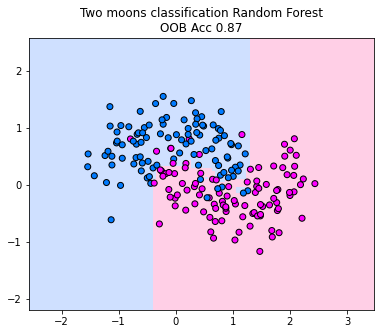

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.datasets import make_moons


X,y = make_moons(noise=0.3, random_state=0, n_samples=200)

_, ax = plt.subplots(ncols=1, figsize=(12, 5))
cm = ListedColormap(["#a0c3ff", "#ffa1cf"])
cm_points = ListedColormap(["#007bff", "magenta"])
rf = RandomForestClassifier(max_depth=None, n_estimators=10, max_features=1,oob_score=True, random_state=42)
y_pred = rf.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    rf,
    X,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.5,
    ax=ax,
    cmap=cm,
)
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k",cmap = cm_points)
_ = disp.ax_.set_title(
    f"Two moons classification Random Forest\nOOB Acc {rf.oob_score_}"
)
ax.axis('scaled')

plt.show()


## Random Forests for Regression *
Assume that the decision trees in $ {\cal E} $ were designed to perform a regression task instead of a classification task. A decision tree $ f_{dtj} $ can do that by storing training samples from $ {\cal D}_j $ at the leaves. In particular, let the training dataset split $$ {\cal D}_{\boldsymbol{\ell}}^{(b)} = \bigcup_{i=1}^{| {\cal D}_{\boldsymbol{\ell}}^{(b)} | } \lbrace \left( {\bf x}_{i}, z_{i} \right) \rbrace $$ collect the data items at the leaf $ \boldsymbol{\ell} $ associated with an input data item $ {\bf x} $. Recap: the binary sequence $ \boldsymbol{\ell} $ indicates which decisions were satisfied ($1$) or not ($0$) by $ {\bf x} $ along the branch from the root to its corresponding leaf and therefore uniquely identifies the leaf itself. We can use e.g. a convex combination $$ h_{DT}({\bf x}; {\cal T}^{(b)}) = \sum_{i=1}^{| {\cal D}_{\boldsymbol{\ell}}^{(b)} |} \alpha_{i}({\bf x}; {\bf x}_{i}) z_{i} $$ to compute the predicted value such that $ \alpha_{i}({\bf x}; {\bf x}_{i}) \propto || {\bf x} - {\bf x}_{i} || $ and $ \sum_{i=1}^{| {\cal D}_{\boldsymbol{\ell}}^{(b)} |} \alpha_{i}({\bf x}; {\bf x}_{i}) = 1 $. In this case, we can combine the predicted values $ \lbrace \hat{z}^{(b)} \rbrace $ obtained by the ensemble $ {\cal E} $ by simply averaging. Thus, for a given feature vector $ {\bf x} $, we can write 
\begin{eqnarray}
 h_{RF}({\bf x}) &=& \frac{1}{B} \sum_{b=1}^{B} \hat{z}^{(b)} \nonumber \\
\hat{z}^{(b)} &=& h_{DT}({\bf x}; {\cal T}^{(b)}), \,\, \forall b \in \lbrace 1, \ldots, B \rbrace. \nonumber
\end{eqnarray}

Additive ensembles $f(x) = \sum_{i=1}^M w_i h_i(x)$ wobei $w_i \in \mathbb R$ und $h_i$ sind DTs        
Theorie: Die Rademacherkomplexität eines additiven Ensembles ist der gewichtete Durchschnitt der Einzelkomplexitäten jedes Baumes ⇒ im Durchschnitt kleine Bäume ⇒ gute Bound  
 - Beweis für den gewichteten Durchschnitt https://proceedings.mlr.press/v32/cortesb14.html
 - Abschätzung über die Komplexität von Bäumen https://arxiv.org/abs/2111.04409

Boosting: Trainiere kleine (in der Theorie stumps, in der Praxis Tiefe <= 5) trees in Runden       
* AdaBoost: Trainiere Klassifikationsbäume # In der Praxis vermutlich komplett durch XGBoost und Co. ersetzt 
    \begin{align*}
            h_{i+1} &= \arg\min_h L(\sum_{i=1}^M w_i h_i(x) + h(x), D) \text{# Finde ein h}\\
            w_{i+1}  &= \arg\min_h L(\sum_{i=1}^M w_i h_i(x) + wh(x), D) \text{# Liniensuche für das optimale Gewicht}
    \end{align*}

* Gradient boosting: Trainiere Regressionsbäume (für ein Klassifikationsproblem)
$$h_{i+t} = \arg\min_h L(\sum_{i=1}^M w_i h_i(x) + wh(x), D)$$ wobei D der Datensatz ist und w ein festes Gewicht  # Liniensuche wird meistens nicht mehr gemacht
    * Bekannte Frameworks/Variationen: XGBoost (GPU Support + Regularisierung im Loss), LightGBM (GPU + sampling based DT Algorithmus), CatBoost (GPU + besonderes Loss für kategorische Variable)

* Random Forest: Trainiere große Klassifikationsbäume parallel (Bagging + weitere Randomisierung beim Lernen der Bäume)
(!) Das funktioniert gut entgegen der PAC Bound oben      
Einzelne große Bäume = "Starke Lerner" ⇒ niedriger Bias, hohe Varianz
Der Generalisierungsfehler eines RF ist die $\rho (1-s^2) / s^2$ wobei $\rho$ die Korrelation zwischen den Bäumen und s^2 den Bias der Bäume misst 
https://link.springer.com/article/10.1023/A:1010933404324       
Eine weitere Erklärung für die Robustheit von RF gegenüber Noise in den Daten ist, dass RF effektiv interpolieren: Korrekte Datenpunkte kommen vermutlich in den meisten Bootstrap samples vor, sodass die meisten Bäume diese korrekt identifizieren, wobei noisy Punkte nur vereinzelnd vorkommen. Diese werden in jedem Baum isoliert (da jeder Baum overfittet) https://arxiv.org/abs/1504.07676